In [487]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC 
from random import seed, uniform
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
import matplotlib.pyplot as plt
from matplotlib import colors, rcParams
from sklearn.gaussian_process.kernels import Matern
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
rcParams['figure.figsize'] = [8, 6]

In [452]:
iris = load_iris()

In [453]:
c_max = 10
g_max = 10

In [454]:
seed(1995)
random_points = [[uniform(0.00000001, c_max), uniform(0.00000001, g_max)] for i in range(50)]

res = []
for c, g in random_points:
    svm = SVC(C = c, gamma = g)
    acc = cross_val_score(svm, iris.data[:,:2] , iris.target, scoring='accuracy', cv=5).mean()
    res.append(acc)
    
X = np.array(random_points)
Y = np.array(res)

In [455]:
x, y = np.meshgrid(np.linspace(0.00000001, c_max, 1000), np.linspace(0.00000001, g_max, 100))
space = np.zeros(200000).reshape(100000, 2)
space[:, 0] = x.reshape(1, x.size)
space[:, 1] = y.reshape(1, y.size)

gpr = GaussianProcessRegressor(kernel = Matern(length_scale=1.0, nu=1.5)).fit(X, Y)
pred = gpr.predict(space)

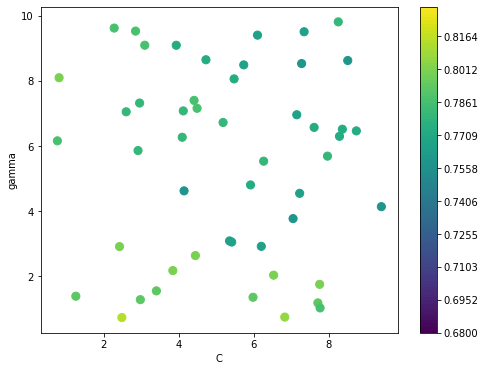

In [485]:
min_acc = np.round(min([min(res), np.min(pred)]), 2)
max_acc = np.round(max([max(res), np.max(pred)]), 2)

viridis = plt.cm.get_cmap('viridis', 100)
cmap = colors.ListedColormap(viridis(np.linspace(0, 1, 100)))
bounds = np.linspace(min_acc, max_acc, 100)
norm = colors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure()
plt.scatter(X[:,0], X[:,1], c=res, cmap=cmap, norm=norm, s=rcParams['lines.markersize'] ** 2 + 30)
# plt.xticks([100*i for i in range(1, 10)], range(1, 10))
# plt.yticks([10*i for i in range(1, 10)], range(1, 10))
plt.xlabel('C')
plt.ylabel('gamma')
plt.colorbar()
plt.show()

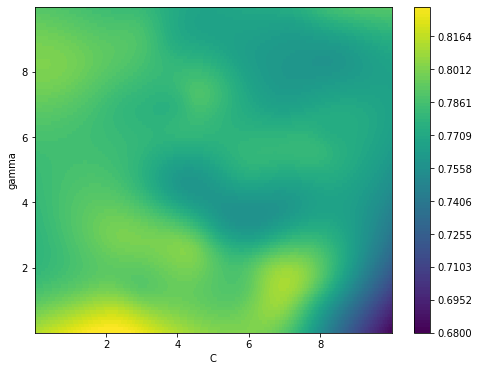

In [480]:
plt.pcolor(pred.reshape(x.shape), cmap=cmap, norm=norm)
plt.xticks([100*i for i in range(2, 10, 2)], range(2, 10, 2))
plt.yticks([10*i for i in range(2, 10, 2)], range(2, 10, 2))
plt.xlabel('C')
plt.ylabel('gamma')
plt.colorbar()
plt.show()